# *Assignment1: Visualizing Oil & Gas Price Trends from the 'astsadata' dataset*

**Submitted by Group 2:**
- Sepide Aghajanpoor
- Nazila Fazeli
- Mona Jazinaninejad
- Parisa Bagheri

**Course: Forecasting & Predictive Analytics**

# *Introduction*
In this assignment, we examine the weekly time series data of oil and gas prices from December 1999 to June 2010. Our primary focus is on visualizing these datasets to identify notable trends and fluctuations. By plotting the data, we observe significant price movements, such as the sharp increases in mid-2008 and subsequent declines in early 2009. These visualizations serve as a foundation for future in-depth analyses to understand the underlying factors influencing these price changes.

In [2]:
# The authors of the textbook have developed an R package, namely astsa (Applied Statistical Time Series Analysis). 
# In order to access all time series datasets in the package astsa in Python, which are discussed in the textbook, 
# install astsadata in Python.

!pip install astsadata

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from astsadata import *

C:\Users\paris\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\paris\anaconda3\lib\site-packages\pandas\

In [4]:
print(dir(astsadata))

['EQ5', 'EQcount', 'EXP6', 'HCT', 'Lynx', 'PLT', 'UnempRate', 'WBC', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'ar1miss', 'arf', 'beamd', 'birth', 'blood', 'bnrf1ebv', 'bnrf1hv', 'cardox', 'chicken', 'climhyd', 'cmort', 'cpg', 'djia', 'econ5', 'eqexp', 'flu', 'fmri1', 'gas', 'gdp', 'globtemp', 'globtempl', 'gnp', 'gtemp', 'gtemp2', 'gtemp_land', 'gtemp_ocean', 'hor', 'jj', 'lap', 'lead', 'nyse', 'oil', 'os', 'part', 'path', 'pd', 'polio', 'prodn', 'qinfl', 'qintr', 'rec', 'sales', 'salmon', 'salt', 'saltemp', 'so2', 'soi', 'soiltemp', 'speech', 'star', 'sunspotz', 'tempr', 'unemp', 'varve']


- Consider the two time series 'oil' and 'gas' from the 'astsadata' dataset. The oil series is in dollars per barrel, while the gas series is in cents per gallon. 

<ol style='list-style-type: lower-roman';>
<li>Write a brief intro about the two time series datasets.</li>
<li>Plot both time series in one frame.</li>

# *Brief Intro*

The two time series datasets represent historical price trends for oil and gas over a period from approximately 1999 to 2010. The oil price dataset is measured in USD per barrel and reflects the market price fluctuations of crude oil over time. The gas price dataset, measured in cents per gallon, captures the variations in gas prices across the same time frame.

Both datasets show the evolution of commodity prices influenced by market conditions, supply-demand dynamics, and significant global events, such as economic recessions and geopolitical factors. By analyzing these time series, we can observe trends, volatility, and the impact of external shocks on these essential energy markets, which are critical for understanding pricing strategies, supply chain management, and economic implications in the energy sector.

In [5]:
print("First 10 rows of the 'oil' DataFrame:")
print(oil.head(10))

print("\nFirst 10 rows of the 'gas' DataFrame:")
print(gas.head(10))

First 10 rows of the 'oil' DataFrame:
                       value
index                       
1999-12-27/2000-01-02  26.20
2000-01-03/2000-01-09  26.07
2000-01-10/2000-01-16  26.34
2000-01-17/2000-01-23  24.95
2000-01-24/2000-01-30  26.27
2000-01-31/2000-02-06  29.37
2000-02-07/2000-02-13  28.34
2000-02-14/2000-02-20  28.08
2000-02-21/2000-02-27  28.83
2000-02-28/2000-03-05  29.87

First 10 rows of the 'gas' DataFrame:
                        value
index                        
1999-12-27/2000-01-02  70.636
2000-01-03/2000-01-09  71.040
2000-01-10/2000-01-16  68.490
2000-01-17/2000-01-23  65.137
2000-01-24/2000-01-30  67.918
2000-01-31/2000-02-06  75.117
2000-02-07/2000-02-13  72.970
2000-02-14/2000-02-20  76.106
2000-02-21/2000-02-27  78.158
2000-02-28/2000-03-05  82.272


# **Oil & Gas price time series plot + Standard Deviations**

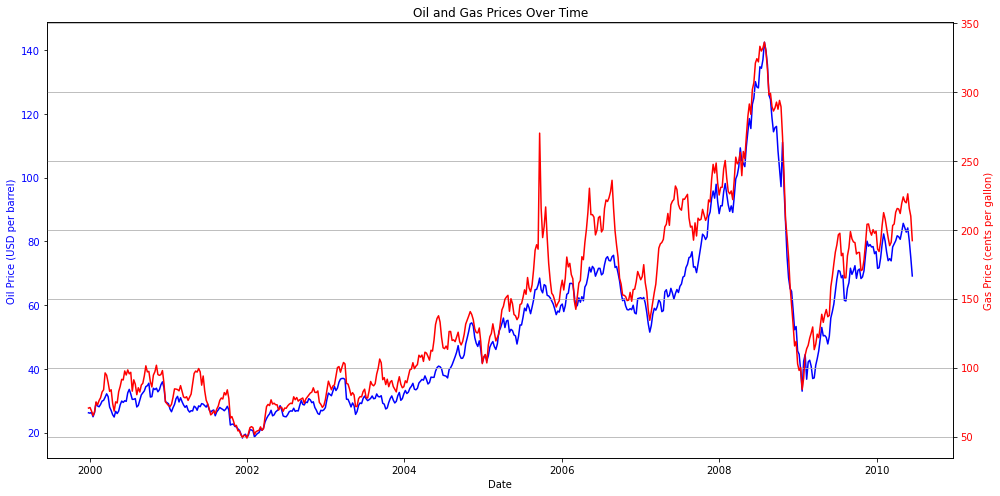

In [6]:
# Convert PeriodIndex to DatetimeIndex
oil.index = oil.index.to_timestamp()
gas.index = gas.index.to_timestamp()

# Proceed with plotting
import matplotlib.pyplot as plt

# Option 2: Use Dual Y-Axes for Different Units
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the oil series on the primary y-axis
ax1.plot(oil.index, oil, color='blue', label='Oil Price (USD per barrel)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Oil Price (USD per barrel)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the gas series
ax2 = ax1.twinx()
ax2.plot(gas.index, gas, color='red', label='Gas Price (cents per gallon)')
ax2.set_ylabel('Gas Price (cents per gallon)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title('Oil and Gas Prices Over Time')
fig.tight_layout()
plt.grid(True)

plt.show()

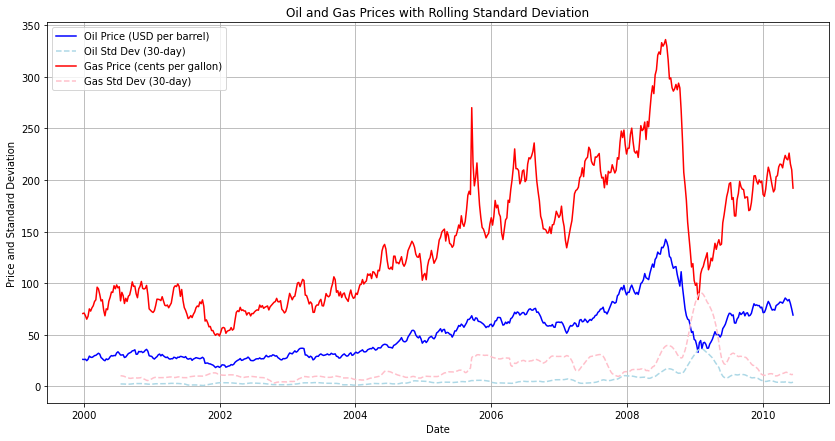

In [7]:
import matplotlib.pyplot as plt

# Calculate the rolling standard deviation (e.g., 30-day window)
oil_std = oil.rolling(window=30).std()
gas_std = gas.rolling(window=30).std()

# Create a plot for oil prices and their standard deviation
plt.figure(figsize=(14, 7))

# Plot the oil price
plt.plot(oil.index, oil, label='Oil Price (USD per barrel)', color='blue')

# Plot the rolling standard deviation for oil
plt.plot(oil_std.index, oil_std, label='Oil Std Dev (30-day)', linestyle='--', color='lightblue')

# Plot the gas price
plt.plot(gas.index, gas, label='Gas Price (cents per gallon)', color='red')

# Plot the rolling standard deviation for gas
plt.plot(gas_std.index, gas_std, label='Gas Std Dev (30-day)', linestyle='--', color='pink')

# Add titles and labels
plt.title('Oil and Gas Prices with Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price and Standard Deviation')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Normalization

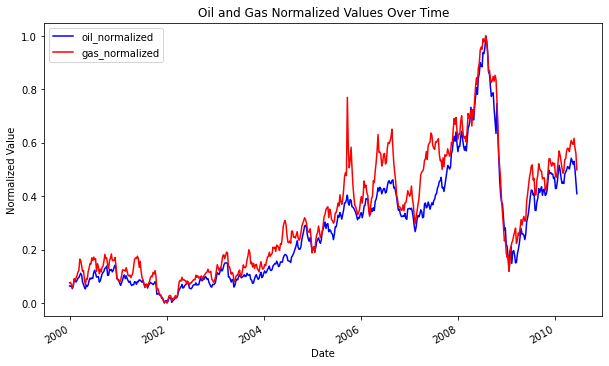

In [14]:
# Convert cent to dollor for gas price
gas_copy = gas.copy()
gas_copy.loc[:, 'value'] = gas_copy['value'] / 100

# Normalize both oil and gas prices (scale between 0 and 1)
oil['value_normalized'] = (oil['value'] - oil['value'].min()) / (oil['value'].max() - oil['value'].min())
gas_copy['value_normalized'] = (gas_copy['value'] - gas_copy['value'].min()) / (gas_copy['value'].max() - gas_copy['value'].min())

# Create a new DataFrame with the normalized values 
df_combined = pd.DataFrame({
    'oil_normalized': oil['value_normalized'].values,
    'gas_normalized': gas_copy['value_normalized'].values
}, index=oil.index)

df_combined.plot(figsize=(10, 6), color={'oil_normalized': 'blue', 'gas_normalized': 'red'})

plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('Oil and Gas Normalized Values Over Time')

plt.show()


# ***Trends Analysis***

**1. Gradual Rise (2000-2008)**

Trend: From 2000 to mid-2008, both oil and gas prices exhibited a consistent upward trend.
Drivers:
Increased Global Demand: Rapid economic growth, particularly in emerging economies such as China and India, led to heightened global demand for oil, pushing prices up steadily.
Geopolitical Tensions: The Iraq War (beginning in 2003) and ongoing instability in the Middle East raised concerns about oil supply security, adding to price increases.

Analysis: 
This period reflects the impact of rising industrialization and urbanization, where energy demands surged globally, creating pressure on oil and gas supply chains.

**2. Volatility in Gas Prices (Late 2006 - Early 2007)**

Observation: Gas prices experienced heightened volatility between late 2006 and early 2007, with noticeable fluctuations not mirrored by oil prices.
Causes:
Refinery Disruptions and Seasonal Demand: Operational issues, along with increased seasonal demand, led to supply disruptions.
Regulatory Changes: The introduction of regulations requiring more ethanol-blended gasoline added uncertainty, impacting supply stability and prices.
Analysis: 
This highlights the sensitivity of gas prices to both operational factors (like refinery output) and regulatory changes, which can induce rapid and sometimes unpredictable price spikes in the gas market.

**3. Price Spike in Mid-2008**

Observation: Oil prices exceeded $140 per barrel, and gas prices surged above $300 per gallon, marking a peak in mid-2008.

Causes:
Oil Supply Constraints: Production limitations set by OPEC and continued geopolitical tensions created supply pressures that kept prices high.
Speculative Investments: Increased speculation by investors betting on rising prices further fueled the rapid price escalation.

Analysis: 
This spike represents a peak in energy prices fueled by both market fundamentals (supply and demand) and speculative behavior, as high demand met constrained supply.

**4. Sudden Drop in Late 2008**

Observation: A steep decline in both oil and gas prices occurred following the 2008 financial crisis.

Causes:
Global Financial Crisis: The crisis led to a sudden drop in industrial and transportation demand as economies contracted.
Speculative Withdrawal: As financial markets collapsed, speculative investment in commodities, including oil and gas, declined sharply.

Analysis: 
This drop reflects the impact of the global economic downturn, where reduced economic activity led to a contraction in energy demand. This was one of the most significant short-term declines in energy prices in recent history.

**5. Gradual Recovery (2009-2010)**

Trend: 
Following the 2008-2009 drop, both oil and gas prices began a gradual recovery starting in 2009.
Drivers:
Stimulus Measures: Governments around the world implemented stimulus packages to revive economic activity, which in turn boosted energy demand.
OPEC Production Cuts: To stabilize prices, OPEC adjusted production levels, contributing to the gradual price increase.

Analysis: 

This period represents a phase of stabilization and recovery as economies recovered from the financial crisis and energy demand picked up.

**6. Mid-2005 Gas Price Spike with Stable Oil Prices**

Observation: In mid-2005, gas prices spiked due to specific factors, while oil prices remained relatively stable.

Causes:

Hurricanes Katrina and Rita: These hurricanes impacted the Gulf of Mexico, disrupting gas production and distribution infrastructure. This led to a significant supply shortage for gas, whereas oil prices were less affected.

Analysis: 

This instance underscores how regional events can disproportionately affect gas markets, especially when production and supply chains are concentrated in specific locations, such as the Gulf of Mexico.

**7. Periodic Declines in 2002 and 2007**

- 2002:

Causes: 
Following the 9/11 attacks, the global economy faced a downturn, leading to decreased demand for energy. Additionally, increased production from OPEC members led to oversupply, driving prices down.
Analysis: 
This downturn reflects the combined effect of lower demand and increased supply, typical of a market response to geopolitical and economic disruptions.
- 2007:

Causes: 
The early stages of the U.S. housing crisis began to affect the broader economy, reducing demand for energy. Additionally, a strengthening U.S. dollar led to lower prices for dollar-denominated commodities like oil and gas.
Analysis: 
The 2007 decline was a precursor to the larger economic contraction that would fully materialize in 2008, showing the early signs of demand reduction.

**8. Standard Deviation and Volatility Analysis**

- Oil and Gas Volatility: The standard deviation analysis reveals that gas prices were generally more volatile than oil prices throughout this period. This higher volatility in gas can be attributed to its sensitivity to seasonal demand, supply disruptions, and regulatory changes.

- 2008 Volatility Spike: The standard deviation of both oil and gas prices peaked in 2008, reflecting the extreme fluctuations caused by the financial crisis. This period of high volatility signifies market uncertainty and the rapid changes in demand and supply dynamics.

- Post-2008 Stability: After 2008, the standard deviations of both commodities stabilize, suggesting that the markets adjusted to the economic downturn. This period of relative stability indicates fewer extreme fluctuations in both demand and supply, likely due to regulatory and production adjustments.

**Comprehensive Summary:**
The oil and gas prices from 1999 to 2010 reflect a complex interplay of economic growth, geopolitical tensions, natural disasters, regulatory changes, and financial market dynamics. The early 2000s saw steady price growth driven by rising global demand and geopolitical instability, peaking sharply in 2008 due to supply constraints and speculation. The 2008 financial crisis caused a rapid decline as demand plummeted, followed by a gradual recovery with economic stimulus and OPEC's production cuts.

Gas prices were more volatile than oil, especially sensitive to operational disruptions and regulatory changes, as seen in the late 2006 and mid-2005 periods. The rolling standard deviations illustrate these periods of heightened volatility, highlighting the resilience of oil to certain shocks and the vulnerability of gas to specific regional events. Overall, these trends underline the importance of monitoring external economic, geopolitical, and environmental factors in supply chain and pricing strategies for energy commodities.